# Redes neuronales

#### Paul Belches  17088
#### 15/04/20

In [62]:
#Setup
from jacobianCost import *
from cost import *
import scipy.optimize as op
import numpy as np
from feedForward import *
from tempfile import TemporaryFile
import matplotlib
import matplotlib.pyplot as plt
shapes = []
inputSize = 0
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')

Se calculan los valores del tamaño, para las particiones del data set. 

In [63]:
cvLength = np.shape(X_train)[0] * 20 //100
trainLenght = np.shape(X_train)[0] * 60 //100

A partir de estos valores se generan las particiones de testeo y validación cruzada.

In [64]:
X_CV = X_train[trainLenght:trainLenght + cvLength]
X_test = X_train[trainLenght + cvLength:]
y_CV = y_train[trainLenght:trainLenght + cvLength]
y_test = y_train[trainLenght + cvLength:]

Se comenzó por generar una red neuronal de 3 capas. Siendo la primera, las entradas, la segunda la capa oculta y la última, las salidas de la red Neuronal. Para el tamaño de la capa oculta se trabajo con la mitad del tamaño del imput. Es decir, 392 neuronas. 

Se dieron 500 iteraciones a la función de optimización para la mejora de los valores de la matriz de transición. 

In [65]:
from tempfile import TemporaryFile
H = np.load('H1.npy')

In [66]:
X = X_test / 1000
rowNumber = np.size(X,0)
inputSize = np.shape(X)[1]
neuronalNumber = inputSize // 2
shapes.append( (neuronalNumber, inputSize + 1) )
shapes.append( (10, neuronalNumber + 1) )
prediccions = feedForward(X, inflateMatrix(H,shapes))

In [67]:
confusionMatrix = np.zeros(100).reshape((10, 10))

In [68]:
cont = 0
for i in range(np.shape(prediccions[-1])[0]):
    if (np.argmax(prediccions[-1][i]) == y_test[i] ):
        cont+=1
    confusionMatrix[np.argmax(prediccions[-1][i])][y_test[i]] += 1 
print(cont)
cont/np.shape(prediccions[-1])[0]

10125


0.84375

In [69]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

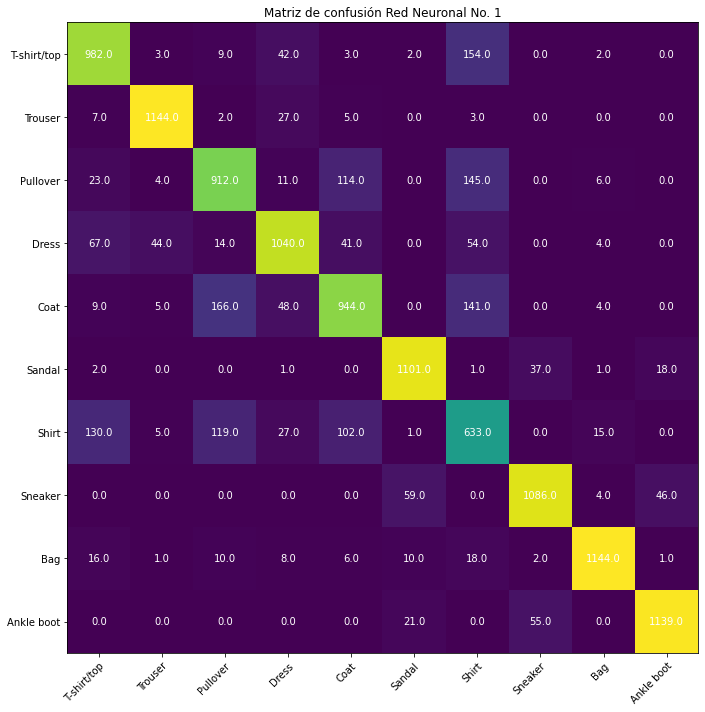

In [70]:
tags = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
fig, ax  = plt.subplots()
im = ax.imshow(confusionMatrix)

ax.set_xticks(np.arange(len(tags)))
ax.set_yticks(np.arange(len(tags)))

ax.set_xticklabels(tags)
ax.set_yticklabels(tags)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

for i in range(len(tags)):
    for j in range(len(tags)):
        text = ax.text(j, i, confusionMatrix[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Matriz de confusión Red Neuronal No. 1")
fig.tight_layout()
plt.show()


Como se puede observar se obtuvo un rendimiento del 84.38%. Este se apega con el valor teorico del modelo. En su mayoria todas las prendas se predicen con gran certeza, siento Shirt que conto con un menor cantidad de prendas predichas de manera correcta. Por lo que se podría tratar, y/o alimentar el data set con más imagenes para tratar de mejorar la certeza. 

Además se realiza la validación cruzada para el modelo. 

In [71]:
X = X_CV/ 1000
rowNumber = np.size(X,0)
inputSize = np.shape(X)[1]
neuronalNumber = inputSize // 2
shapes.append( (neuronalNumber, inputSize + 1) )
shapes.append( (10, neuronalNumber + 1) )
prediccions = feedForward(X, inflateMatrix(H,shapes))

In [72]:
cont = 0
for i in range(np.shape(prediccions[-1])[0]):
    if (np.argmax(prediccions[-1][i]) == y_CV[i] ):
        cont+=1
    confusionMatrix[np.argmax(prediccions[-1][i])][y_test[i]] += 1 
print(cont)
cont/np.shape(prediccions[-1])[0]

10246


0.8538333333333333

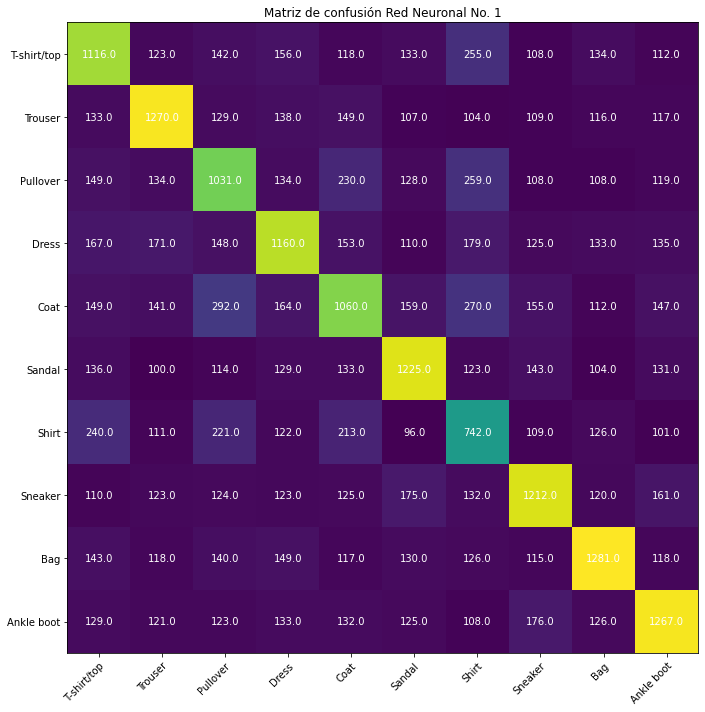

In [73]:
tags = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
fig, ax  = plt.subplots()
im = ax.imshow(confusionMatrix)

ax.set_xticks(np.arange(len(tags)))
ax.set_yticks(np.arange(len(tags)))

ax.set_xticklabels(tags)
ax.set_yticklabels(tags)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

for i in range(len(tags)):
    for j in range(len(tags)):
        text = ax.text(j, i, confusionMatrix[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Matriz de confusión Red Neuronal No. 1")
fig.tight_layout()
plt.show()

Como se puede observar se obtuvo un rendimiento del 85.38%, para la validación cruzada. Lo que prueba que si existe una independecia entre los sets de entrenamiento y prueba, por lo que se acepta el rendimiento obtenido anteriormente en el modelo. 

Con el objetivo de evaluar si es posible obtener una Red neuronal con un mejor rendimiento, se generá una red Neuronal con la mitad de neuronas en la capa oculta.  

In [74]:
H = np.load('H2.npy')
shapes = []

In [75]:
X = X_test / 1000
rowNumber = np.size(X,0)
inputSize = np.shape(X)[1]
neuronalNumber = inputSize // 4
shapes.append( (neuronalNumber, inputSize + 1) )
shapes.append( (10, neuronalNumber + 1) )
prediccions = feedForward(X, inflateMatrix(H,shapes))

In [76]:
confusionMatrix = np.zeros(100).reshape((10, 10))

In [77]:
cont = 0
for i in range(np.shape(prediccions[-1])[0]):
    if (np.argmax(prediccions[-1][i]) == y_test[i] ):
        cont+=1
    confusionMatrix[np.argmax(prediccions[-1][i])][y_test[i]] += 1 
print(cont)
cont/np.shape(prediccions[-1])[0]

10119


0.84325

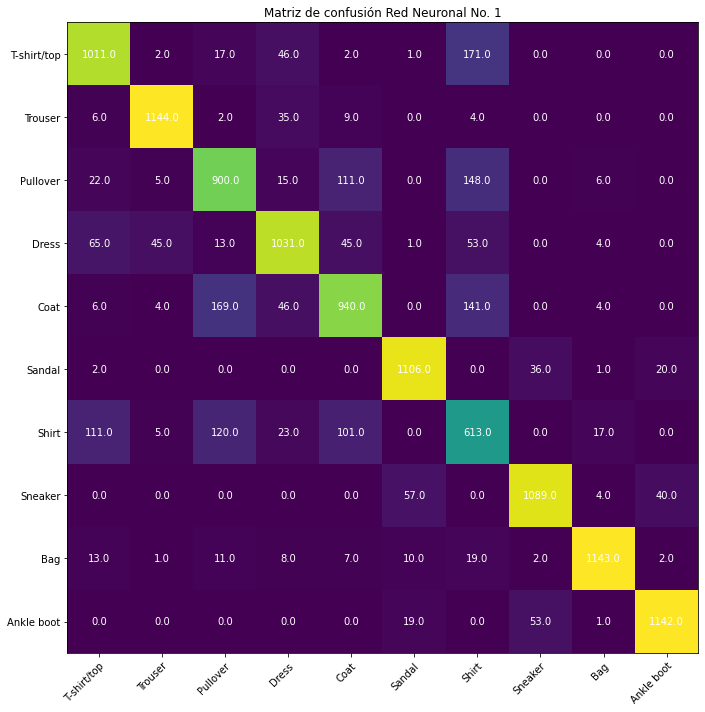

In [78]:
tags = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
fig, ax  = plt.subplots()
im = ax.imshow(confusionMatrix)

ax.set_xticks(np.arange(len(tags)))
ax.set_yticks(np.arange(len(tags)))

ax.set_xticklabels(tags)
ax.set_yticklabels(tags)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

for i in range(len(tags)):
    for j in range(len(tags)):
        text = ax.text(j, i, confusionMatrix[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Matriz de confusión Red Neuronal No. 1")
fig.tight_layout()
plt.show()

Como se puede observar para este nuevo modelo se obtuvo un rendimiento del 84.33%. Este se apega con el valor teorico del modelo y concuerda con el valor optenido del primer modelo. En su mayoria todas las prendas se predicen con gran certeza, siento Shirt una vez más la que conto con un menor cantidad de prendas predichas de manera correcta. Sin embargo gracias a que la cantidad es menor, se considera el modelo número uno como un mejor modelo. 

De una misma manera se realiza la validación cruzadad para evluar el rendimiento del modelo. 

In [79]:
confusionMatrix = np.zeros(100).reshape((10, 10))

In [80]:
X = X_CV/ 1000
rowNumber = np.size(X,0)
inputSize = np.shape(X)[1]
neuronalNumber = inputSize // 4
shapes.append( (neuronalNumber, inputSize + 1) )
shapes.append( (10, neuronalNumber + 1) )
prediccions = feedForward(X, inflateMatrix(H,shapes))

In [81]:
cont = 0
for i in range(np.shape(prediccions[-1])[0]):
    if (np.argmax(prediccions[-1][i]) == y_CV[i] ):
        cont+=1
    confusionMatrix[np.argmax(prediccions[-1][i])][y_CV[i]] += 1
print(cont)
cont/np.shape(prediccions[-1])[0]

10199


0.8499166666666667

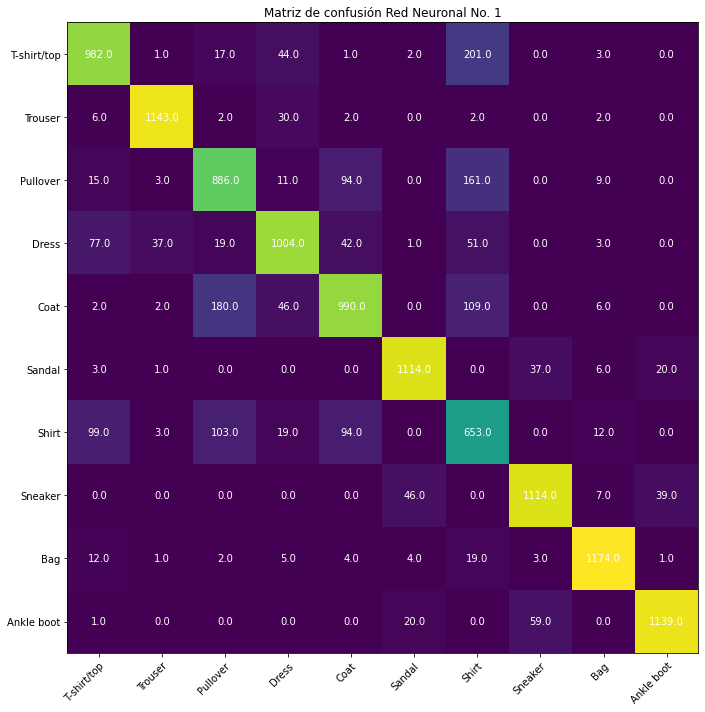

In [82]:
tags = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
fig, ax  = plt.subplots()
im = ax.imshow(confusionMatrix)

ax.set_xticks(np.arange(len(tags)))
ax.set_yticks(np.arange(len(tags)))

ax.set_xticklabels(tags)
ax.set_yticklabels(tags)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

for i in range(len(tags)):
    for j in range(len(tags)):
        text = ax.text(j, i, confusionMatrix[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Matriz de confusión Red Neuronal No. 1")
fig.tight_layout()
plt.show()

Como se puede observar se obtuvo un rendimiento del 84.99%, para la validación cruzada. Lo que prueba que si existe una independecia entre los sets de entrenamiento y prueba, por lo que se acepta el rendimiento obtenido anteriormente en el modelo. 

# Conclusión

Se considera que la arquitectura del primer modelo optenido es el indicado. Esto gracias a que se incio por el valor teórico, por lo que una mayor cantidad de neuronas no haría sentido. Y por que al disminuir la cantidad de neuronas se disminuye la presión para identificar a la clase de Shirt. 